### 07_LSTM_imdb

word_index = datasets.imdb.get_word_index()  
index_word = {v:k for k,v in word_index.items()}  
judge = lambda x:1 if x>0.5 else 0  


In [25]:
import os,sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models,optimizers,Sequential,metrics,losses,utils
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence

print(sys.version)
print(tf.test.is_gpu_available())
print(tf.__version__)

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
False
2.0.0


In [90]:
num_words = 2000 # 20000
maxlen = 100
# 取得 imdb key value 對照表
word_index = datasets.imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print("x_train 短評字數")
for i in range(30):
    print(len(x_train[i]),end="\t")
print()
print("x_test 短評字數")
for i in range(30):
    print(len(x_test[i]),end="\t")

x_train 短評字數
218	189	141	550	147	43	123	562	233	130	450	99	117	238	109	129	163	752	212	177	129	140	256	888	93	142	220	193	171	221	
x_test 短評字數
68	260	603	181	108	132	761	180	134	370	209	248	398	326	131	255	127	184	188	105	230	137	88	70	170	305	273	134	232	264	

In [91]:
def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:train_nums], y_test[:train_nums]
    
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)
    
(x_train, y_train), (x_test, y_test) = data_normalize((x_train, y_train), (x_test, y_test),scale=10)
print("x_train 短評字數")
for i in range(30):
    print(len(x_train[i]),end="\t")
print()
print("x_test 短評字數")
for i in range(30):
    print(len(x_test[i]),end="\t")

(2500, 100) (2500,)
(2500, 100) (2500,)
x_train 短評字數
100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	
x_test 短評字數
100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	100	

In [38]:
print("x_train[0]\n",x_train[0])
print("x_train[0] index->word")
for i in range(len(x_train[0])):
    index = x_train[0][i]
    print(index_word[index]+"("+str(index)+")", end=" ")

x_train[0]
 [1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7    2    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32    2   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16    2  113  103   32   15   16    2   19
  178   32]
x_train[0] index->word
critics(1415) they(33) is(6) you(22) that(12) isn't(215) one(28) will(77) very(52) to(5) as(14) itself(407) with(16) other(82) and(2) in(8) of(4) seen(107) over(117) and(2) for(15) anyone(256) of(4) and(2) br(7) and(2) to(5) whether(723) from(36) than(71) out(43) themselves(530) history(476) he(26) name(400) half(317) some(46) br(7) of(4) and(2) odd(1029) was(13) two(104) most(88) of(4) mean(381) for(15) 1(297) any(98) an(32) and(2) she(56) he(26) shou

In [189]:
## SimpleRNNCell 一直出錯
class Simple_LSTM(models.Model):
    def __init__(self, units):
        super(Simple_LSTM, self).__init__()
        self.state_0 = [tf.zeros([batch_size, units])]        
        self.embedding = layers.Embedding(input_dim=num_words, output_dim=embed_outdim, input_length=maxlen)
        self.block_1 = layers.SimpleRNNCell(units, dropout=0.1) #units: dimensionality of the output space 
        self.out = layers.Dense(1)
        
    def call(self, inputs):
        x = self.embedding(inputs)
        state_0 = self.state_0
        for word in tf.unstack(x, axis=1):
            out, state_1 = self.block_1(word, state_0)
            state_0 = state_1
        x = self.out(out)
        prob = tf.sigmoid(x)
        return prob
    
units = 64
embed_outdim = 128
epochs = 10
batch_size = 128

def LSTM_imdb():
    model = Sequential()
    model.add(Embedding(num_words, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = LSTM_imdb()
#optimizer = optimizers.Adam(lr=0.01)
#loss_func = losses.BinaryCrossentropy()
#model.compile(optimizer=optimizer, loss=loss_func,metrics=['accuracy'])

In [190]:
#train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
#train = train.batch(batch_size,drop_remainder=True)
#test =  tf.data.Dataset.from_tensor_slices((x_test,y_test))
#test = test.batch(batch_size,drop_remainder=True)

history = model.fit(x_train,y_train, epochs=epochs,batch_size=batch_size, verbose=1,validation_data=(x_test,y_test))

Train on 2500 samples, validate on 2500 samples
Epoch 1/10
2500/2500 [==============================] - 45s 18ms/sample - loss: 0.6898 - accuracy: 0.5316 - val_loss: 0.6783 - val_accuracy: 0.6140
Epoch 2/10
2500/2500 [==============================] - 42s 17ms/sample - loss: 0.6109 - accuracy: 0.7156 - val_loss: 0.5373 - val_accuracy: 0.7756
Epoch 3/10
2500/2500 [==============================] - 42s 17ms/sample - loss: 0.4594 - accuracy: 0.8096 - val_loss: 0.4789 - val_accuracy: 0.7820
Epoch 4/10
2500/2500 [==============================] - 99s 40ms/sample - loss: 0.3576 - accuracy: 0.8628 - val_loss: 0.4633 - val_accuracy: 0.7936
Epoch 5/10
2500/2500 [==============================] - 49s 20ms/sample - loss: 0.2922 - accuracy: 0.8836 - val_loss: 0.4914 - val_accuracy: 0.7832
Epoch 6/10
2500/2500 [==============================] - 49s 20ms/sample - loss: 0.2649 - accuracy: 0.9048 - val_loss: 0.4946 - val_accuracy: 0.7996
Epoch 7/10
2500/2500 [==============================] - 49s 20ms

In [191]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, None, 128)         256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________


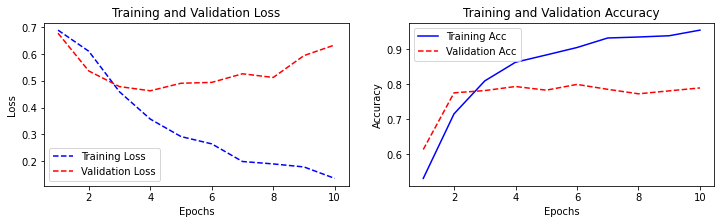

In [192]:
def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

In [203]:
index = 100 # np.random.randint(900)
preds = model.predict(x_test[index:index+10])
print("Predictions")
for i in range(10):    
    judge = lambda x:1 if x>0.5 else 0
    print(str(judge(preds[i])),end=" ")
print()
labels = y_test[index:index+10]
print("Labels")
for i in range(10):  
    print(labels[i],end=" ")
print()

Predictions
1 0 1 0 0 0 1 0 1 1 
Labels
1 1 0 0 0 0 0 0 1 1 
